### https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#18dominanttopicineachsentence


In [1]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

In [2]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
# spacy for lemmatization
import spacy
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
# lda_viz = gensimvis.prepare(ldamodel, corpus, dictionary)

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

/home/kevin-main/anaconda3/envs/datascience/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [3]:
df = pd.read_pickle("data/clean_data/CA_full_data_filtered.pkl")

data = df.TXT.values.tolist()


In [4]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['temperature', 'error', 'correction', 'method', 'for', 'surface', 'air', 'temperature', 'data', 'climate', 'change', 'computational', 'fluid', 'dynamics', 'correction', 'method', 'neural', 'network', 'algorithm', 'temperature', 'data', 'temperature', 'error', 'in', 'climate', 'change', 'research', 'accurate', 'temperature', 'data', 'are', 'often', 'demanded', 'however', 'affected', 'by', 'many', 'factors', 'especially', 'solar', 'radiation', 'the', 'accuracy', 'of', 'environmental', 'air', 'temperature', 'measurement', 'can', 'be', 'greatly', 'reduced', 'since', 'there', 'is', 'difference', 'in', 'temperature', 'between', 'the', 'environmental', 'air', 'and', 'the', 'related', 'temperature', 'measured', 'by', 'the', 'sensor', 'accommodated', 'inside', 'the', 'radiation', 'shield', 'in', 'the', 'paper', 'the', 'term', 'temperature', 'error', 'refers', 'to', 'the', 'temperature', 'difference', 'described', 'above', 'to', 'improve', 'the', 'accuracy', 'of', 'the', 'temperature', 'data',

In [5]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=10) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=10)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['temperature', 'error_correction', 'method', 'for', 'surface', 'air_temperature', 'data', 'climate_change', 'computational_fluid_dynamics', 'correction_method', 'neural_network_algorithm', 'temperature', 'data', 'temperature', 'error', 'in', 'climate_change', 'research', 'accurate', 'temperature', 'data', 'are_often', 'demanded', 'however', 'affected_by', 'many', 'factors', 'especially', 'solar_radiation', 'the', 'accuracy', 'of', 'environmental', 'air_temperature', 'measurement', 'can_be', 'greatly', 'reduced', 'since', 'there_is', 'difference', 'in', 'temperature', 'between', 'the', 'environmental', 'air', 'and', 'the', 'related', 'temperature', 'measured', 'by', 'the', 'sensor', 'accommodated', 'inside', 'the', 'radiation', 'shield', 'in', 'the', 'paper', 'the', 'term', 'temperature', 'error', 'refers_to_the', 'temperature', 'difference', 'described', 'above', 'to_improve', 'the', 'accuracy', 'of', 'the', 'temperature', 'data', 'temperature', 'error_correction', 'method', 'is', 'pr

In [6]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'model', 'Use', 'Base', 'base', 'USE', 'system', 'model', 'uses', 'Model', 'models'])

In [7]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [8]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
data_words_trigrams = make_trigrams(data_words_nostops)
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable = ['ner', 'parser'])


# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_trigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['temperature', 'method', 'surface', 'datum', 'computational_fluid_dynamic', 'temperature', 'datum', 'temperature', 'error', 'research', 'accurate', 'temperature', 'datum', 'often', 'demand', 'however', 'affect', 'many', 'factor', 'especially', 'accuracy', 'environmental', 'measurement', 'greatly', 'reduce', 'difference', 'temperature', 'environmental', 'air', 'relate', 'temperature', 'measure', 'sensor', 'accommodate', 'radiation', 'shield', 'paper', 'term', 'temperature', 'error', 'refer', 'temperature', 'difference', 'describe', 'improve', 'accuracy', 'temperature', 'datum', 'temperature', 'error_correction', 'method', 'propose', 'first', 'computational_fluid_dynamic', 'adopt', 'quantify', 'temperature', 'error', 'accurately', 'neural_network_algorithm', 'applied', 'form', 'fitting', 'temperature', 'error', 'calculate', 'use', 'finally', 'validate', 'correction_equation', 'field', 'observation', 'experiment', 'perform', 'root_mean_square_error', 'temperature', 'error', 'obtain', 'e

In [9]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 3), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 2), (14, 6), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 2), (23, 1), (24, 8), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 2), (40, 1), (41, 2), (42, 1), (43, 1), (44, 3), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 2), (52, 2), (53, 2), (54, 2), (55, 1), (56, 1), (57, 1), (58, 1), (59, 2), (60, 3), (61, 1), (62, 17), (63, 1), (64, 3), (65, 1)]]


In [10]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]



[[('accommodate', 1),
  ('accuracy', 3),
  ('accurate', 1),
  ('accurately', 2),
  ('add', 1),
  ('adopt', 1),
  ('affect', 1),
  ('air', 1),
  ('applied', 1),
  ('calculate', 1),
  ('computational_fluid_dynamic', 2),
  ('continuously', 1),
  ('correction_equation', 1),
  ('correspond', 2),
  ('datum', 6),
  ('degree', 1),
  ('degrees_respectively', 1),
  ('demand', 1),
  ('describe', 1),
  ('determine', 1),
  ('difference', 2),
  ('dtr', 1),
  ('environmental', 2),
  ('environmental_factor', 1),
  ('error', 8),
  ('error_correction', 1),
  ('especially', 1),
  ('experiment', 1),
  ('experimentally', 1),
  ('factor', 1),
  ('factors_influence', 1),
  ('field', 1),
  ('finally', 1),
  ('first', 1),
  ('fitting', 1),
  ('form', 1),
  ('furtherly', 1),
  ('greatly', 1),
  ('however', 1),
  ('improve', 2),
  ('many', 1),
  ('may', 2),
  ('measure', 1),
  ('measurement', 1),
  ('method', 3),
  ('neural_network_algorithm', 1),
  ('observation', 1),
  ('obtain', 1),
  ('often', 1),
  ('paper'

In [11]:
from collections import Counter

frequencies = Counter()
frequencies_ngram = Counter()
stuff = [[(id2word[id], freq) for id, freq in cp] for cp in corpus]
for i, tok in enumerate(stuff):
    for tup in tok:
        if "_" in tup[0]:
            frequencies_ngram[tup[0]] += 1
        frequencies[tup[0]] +=1


print(frequencies.most_common(10))
print(frequencies["neural_network"])

[('use', 3181), ('base', 2204), ('datum', 2003), ('study', 1982), ('method', 1676), ('result', 1646), ('approach', 1269), ('analysis', 1219), ('show', 1214), ('develop', 1185)]
100


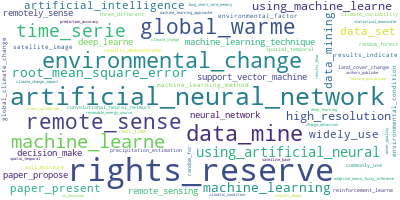

In [12]:
# Nuage de mots
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white", max_words=100)
wordcloud.generate_from_frequencies(frequencies_ngram)
wordcloud.to_image()
# wordcloud.to_file("img/worldcloud.png")
wordcloud.to_image()

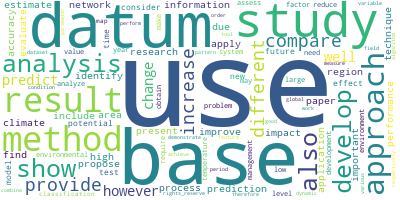

In [13]:
# Nuage de mots
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white", max_words=100)
wordcloud.generate_from_frequencies(frequencies)
wordcloud.to_image()
# wordcloud.to_file("img/worldcloud.png")
wordcloud.to_image()

In [14]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [15]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.027*"datum" + 0.024*"use" + 0.016*"method" + 0.013*"performance" + '
  '0.013*"base" + 0.012*"approach" + 0.008*"apply" + 0.008*"result" + '
  '0.008*"technique" + 0.007*"analysis"'),
 (1,
  '0.021*"use" + 0.010*"estimate" + 0.010*"study" + 0.009*"prediction" + '
  '0.009*"precipitation" + 0.008*"forecast" + 0.008*"climate" + 0.008*"base" + '
  '0.008*"forecasting" + 0.007*"temperature"'),
 (2,
  '0.017*"area" + 0.016*"change" + 0.012*"soil" + 0.010*"map" + 0.010*"use" + '
  '0.009*"study" + 0.008*"high" + 0.008*"region" + 0.007*"increase" + '
  '0.006*"land"'),
 (3,
  '0.030*"learn" + 0.022*"sensor" + 0.020*"classification" + 0.020*"learning" '
  '+ 0.019*"sensing" + 0.019*"adaptive" + 0.018*"image" + 0.015*"asocial" + '
  '0.013*"feature" + 0.012*"environmental_change"'),
 (4,
  '0.011*"social" + 0.011*"system" + 0.010*"management" + 0.009*"energy" + '
  '0.009*"resource" + 0.008*"strategy" + 0.008*"cost" + 0.007*"environment" + '
  '0.006*"environmental" + 0.006*"research"

In [16]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.083488128958674

Coherence Score:  0.36714364135445765


In [17]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                   id2word=id2word,
                                   num_topics=5, 
                                   random_state=100,
                                   update_every=1,
                                   chunksize=100,
                                   passes=10,
                                   alpha='auto',
                                   per_word_topics=True)
coherencemodel = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_value = coherencemodel.get_coherence()
coherence_value

0.36714364135445765

In [18]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)
pyLDAvis.save_html(vis, 'CA.html')
vis

/home/kevin-main/anaconda3/envs/datascience/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.092428  0.064497       1        1  28.064920
2     -0.119752 -0.065982       2        1  24.318072
1     -0.162487  0.158232       3        1  21.226533
4      0.037507 -0.255694       4        1  19.569485
3      0.337160  0.098947       5        1   6.820990, topic_info=                Term         Freq        Total Category  logprob  loglift
14             datum  4399.000000  4399.000000  Default  30.0000  30.0000
969            learn  1417.000000  1417.000000  Default  29.0000  29.0000
215             area  2198.000000  2198.000000  Default  28.0000  28.0000
749   classification  1298.000000  1298.000000  Default  27.0000  27.0000
1814        adaptive   992.000000   992.000000  Default  26.0000  26.0000
...              ...          ...          ...      ...      ...      ...
287             base   228.187290  3143.421238   Topic5  -4.9635   0.0623
569          dynamic   170.829140   903.308804   Topic5  -5.2530   1.0198
674          problem   168.194914   839.921333   Topic5  -5.2686   1.0770
1480           small   158.132241   602.121368   Topic5  -5.3302   1.3481
624          network   165.449905  1118.163515   Topic5  -5.2850   0.7744

[356 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1555      1  0.398594    able
1555      3  0.092696    able
1555      4  0.108918    able
1555      5  0.398594    able
6912      2  0.126575  abrupt
...     ...       ...     ...
354       1  0.042229    year
354       2  0.488490    year
354       3  0.469088    year
442       1  0.996876   yield
2100      2  0.992833    zone

[584 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2, 5, 4])

In [19]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = list(row)[0]
        row = sorted(row, key=lambda x: x[1], reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']


df_dominant_topic


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.6630,"use, estimate, study, prediction, precipitatio...",Temperature error-correction method for surfac...
1,1,0.0,0.4743,"datum, use, method, performance, base, approac...",Ensemble Machine Learning Approach Improves Pr...
2,2,4.0,0.5923,"social, system, management, energy, resource, ...",OPEN SCIENCE AND ARTIFICIAL INTELLIGENCE SUPPO...
3,3,2.0,0.4331,"area, change, soil, map, use, study, high, reg...",Contiguous US surface water availability and s...
4,4,2.0,0.4473,"area, change, soil, map, use, study, high, reg...",No perfect storm for crop yield failure in Ger...
...,...,...,...,...,...
4400,4400,4.0,0.5023,"social, system, management, energy, resource, ...",The effect of social learning in a small popul...
4401,4401,0.0,0.5998,"datum, use, method, performance, base, approac...",Transfer Learning for Performance Modeling of ...
4402,4402,1.0,0.3910,"use, estimate, study, prediction, precipitatio...",Forecasting the spatiotemporal variability of ...
4403,4403,4.0,0.5773,"social, system, management, energy, resource, ...",Strategies for sustainable management of renew...


In [20]:
# Group top 5 sentences under each topic
sent_topics_sorted = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorted = pd.concat([sent_topics_sorted, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorted.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorted.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

sent_topics_sorted = sent_topics_sorted.set_index("Topic_Num")
# Show
sent_topics_sorted.head(8)


,Topic_Perc_Contrib,Keywords,Text
Topic_Num,,,
0.0,0.8258,"datum, use, method, performance, base, approac...",Applying various algorithms for species distri...
1.0,0.8734,"use, estimate, study, prediction, precipitatio...",Bias adjustment of satellite-based precipitati...
2.0,0.8927,"area, change, soil, map, use, study, high, reg...",Forest composition in Mediterranean mountains ...
3.0,0.6654,"learn, sensor, classification, learning, sensi...",Indoor Topological Localization Using a Visual...
4.0,0.8882,"social, system, management, energy, resource, ...",Urban Intelligence for Sustainability Urban in...


In [21]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)
# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts*100/topic_counts.sum(), 4)
topic_counts

sent_topics_sorted = sent_topics_sorted.merge(topic_counts, how = "left", left_index=True, right_index = True)
sent_topics_sorted = sent_topics_sorted.merge(topic_contribution, how = "left", left_index = True, right_index = True)
sent_topics_sorted = sent_topics_sorted.rename(columns={"Dominant_Topic_x": "Articles", "Dominant_Topic_y": "Percentage"})
sent_topics_sorted

,Topic_Perc_Contrib,Keywords,Text,Articles,Percentage
Topic_Num,,,,,
0.0,0.8258,"datum, use, method, performance, base, approac...",Applying various algorithms for species distri...,1130,25.6527
1.0,0.8734,"use, estimate, study, prediction, precipitatio...",Bias adjustment of satellite-based precipitati...,1110,25.1986
2.0,0.8927,"area, change, soil, map, use, study, high, reg...",Forest composition in Mediterranean mountains ...,1066,24.1998
3.0,0.6654,"learn, sensor, classification, learning, sensi...",Indoor Topological Localization Using a Visual...,195,4.4268
4.0,0.8882,"social, system, management, energy, resource, ...",Urban Intelligence for Sustainability Urban in...,904,20.5221


In [22]:
for i,j in sent_topics_sorted.Keywords.items():
    print(i,j)

0.0 datum, use, method, performance, base, approach, apply, result, technique, analysis
1.0 use, estimate, study, prediction, precipitation, forecast, climate, base, forecasting, temperature
2.0 area, change, soil, map, use, study, high, region, increase, land
3.0 learn, sensor, classification, learning, sensing, adaptive, image, asocial, feature, environmental_change
4.0 social, system, management, energy, resource, strategy, cost, environment, environmental, research


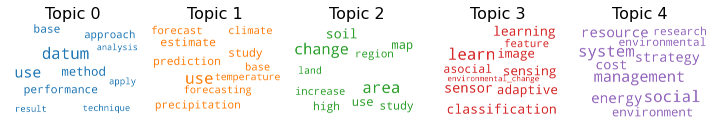

In [23]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=30,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)
topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 5, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [24]:
# Show
dic_of_topic = {0:"Sugarcane crops", 1:"Land", 2:"Precipiration forecast", 3:"Social cost", 4:"Environmental change"}
df_dominant_topic["Topic"] = df_dominant_topic["Dominant_Topic"].apply(lambda x: dic_of_topic[x])

result = pd.concat([df.reset_index(drop=True), df_dominant_topic.Dominant_Topic,df_dominant_topic.Topic,  df_dominant_topic.Keywords], axis=1)
result

,PT,AU,TI,LA,DE,AB,C1,PY,CN,TXT,Dominant_Topic,Topic,Keywords
0,J,"Yang, J; Deng, X; Liu, QQ; Ding, RH",Temperature error-correction method for surfac...,English,climate change; computational fluid dynamics; ...,"In climate change research, accurate temperatu...","[Yang, Jie; Deng, Xuan; Liu, Qingquan] Nanjing...",2020,"[China, China, China]",Temperature error-correction method for surfac...,1.0,Land,"use, estimate, study, prediction, precipitatio..."
1,J,"Mishra, U; Gautam, S; Riley, WJ; Hoffman, FM",Ensemble Machine Learning Approach Improves Pr...,English,soil organic carbon; spatial prediction; machi...,Various approaches of differing mathematical c...,"[Mishra, Umakant; Gautam, Sagar] Sandia Natl L...",2020,"[United States, United States, United States]",Ensemble Machine Learning Approach Improves Pr...,0.0,Sugarcane crops,"datum, use, method, performance, base, approac..."
2,J,"Coro, G",OPEN SCIENCE AND ARTIFICIAL INTELLIGENCE SUPPO...,English,artificial intelligence; big data; blue growth...,The long-term EU strategy to support the susta...,"[Coro, Gianpaolo] Natl Res Council Italy ISTI ...",2020,[Italy],OPEN SCIENCE AND ARTIFICIAL INTELLIGENCE SUPPO...,4.0,Environmental change,"social, system, management, energy, resource, ..."
3,J,"Siddiqui, S; Conkle, JL; Sadovski, A",Contiguous US surface water availability and s...,English,Wastewater treatment plant effluent flow model...,Surface water is a vital and sometimes stresse...,"[Siddiqui, Samreen; Conkle, Jeremy L.] Texas A...",2020,"[United States, United States]",Contiguous US surface water availability and s...,2.0,Precipiration forecast,"area, change, soil, map, use, study, high, reg..."
4,J,"Webber, H; Lischeid, G; Sommer, M; Finger, R; ...",No perfect storm for crop yield failure in Ger...,English,crop yield failure; extreme events; support ve...,Large-scale crop yield failures are increasing...,"[Webber, Heidi; Lischeid, Gunnar; Sommer, Mich...",2020,"[Germany, Germany, Germany, Switzerland, Germany]",No perfect storm for crop yield failure in Ger...,2.0,Precipiration forecast,"area, change, soil, map, use, study, high, reg..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4400,J,"Romero-Mujalli, D; Cappelletto, J; Herrera, EA...",The effect of social learning in a small popul...,English,Learning; Social learning; Agent-based simulat...,Learning is defined as behavioral modification...,"[Romero-Mujalli, Daniel; Tarano, Zaida] Cent U...",2017,"[Venezuela, Venezuela, Venezuela, Germany]",The effect of social learning in a small popul...,4.0,Environmental change,"social, system, management, energy, resource, ..."
4401,C,"Jamshidi, P; Siegmund, N; Velez, M; Kastner, C...",Transfer Learning for Performance Modeling of ...,English,Performance analysis; transfer learning,Modern software systems provide many configura...,"[Jamshidi, Pooyan; Velez, Miguel; Kaestner, Ch...",2017,"[United States, Germany]",Transfer Learning for Performance Modeling of ...,0.0,Sugarcane crops,"datum, use, method, performance, base, approac..."
4402,J,"Freitas, LPS; Lopes, MLM; Carvalho, LB; Panoss...",Forecasting the spatiotemporal variability of ...,English,Neural techniques; Soil respiration; Green har...,Carbon dioxide (CO2) is considered one of the ...,"[Freitas, Luciana P. S.; Minussi, Carlos R.; L...",2018,"[Brazil, Brazil, Brazil, Brazil, Brazil]",Forecasting the spatiotemporal variability of ...,1.0,Land,"use, estimate, study, prediction, precipitatio..."
4403,J,"Lindkvist, E; Ekeberg, O; Norberg, J",Strategies for sustainable management of renew...,English,natural resource management; adaptive manageme...,As a consequence of global environmental chang...,"[Lindkvist, Emilie; Norberg, Jon] Stockholm Un...",2017,"[Sweden, Sweden]",Strategies for sustainable management of renew...,4.0,Environmental change,"social, system, management, energy, resource, ..."


In [25]:
year_topic = result.groupby(["PY", "Topic"]).size()
year_topic = year_topic.unstack(1)
year_topic


Topic,Environmental change,Land,Precipiration forecast,Social cost,Sugarcane crops
PY,,,,,
2010,15,22,25,8,28
2011,21,31,37,6,27
2012,29,35,28,7,43
2013,27,62,53,12,40
2014,45,53,43,13,44
2015,55,74,62,13,66
2016,75,109,69,14,82
2017,90,99,98,25,101
2018,109,153,145,31,163


<AxesSubplot:title={'center':'Climate action over the years, five topics'}, xlabel='PY'>

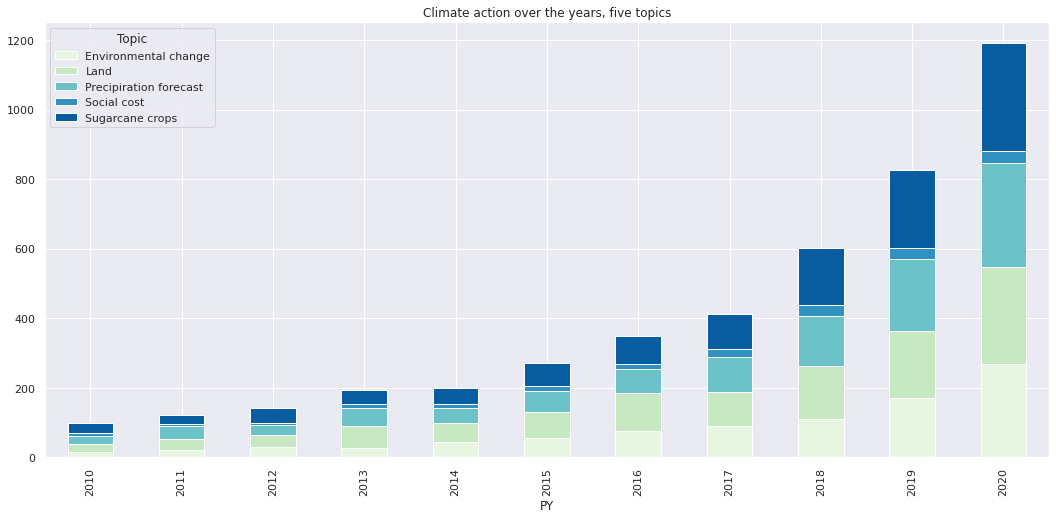

In [33]:
import seaborn as sns
from matplotlib.colors import ListedColormap
sns.set()
gr = year_topic.transpose().T.plot(kind='bar', stacked=True, colormap=ListedColormap(sns.color_palette("GnBu", 10)), figsize=(18,8))
gr.set_title("Climate action over the years, five topics")
gr.figure.savefig("CA_5topics.png")
gr

In [27]:
year_topic_percentage = result.groupby(['PY']).Topic.value_counts(normalize=True).mul(100).unstack(1).transpose()
year_topic_percentage

PY,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Topic,,,,,,,,,,,
Environmental change,15.306122,17.213115,20.422535,13.917526,22.727273,20.370370,21.489971,21.791768,18.136439,20.556227,22.502099
Land,22.448980,25.409836,24.647887,31.958763,26.767677,27.407407,31.232092,23.970944,25.457571,23.458283,23.341730
Precipiration forecast,25.510204,30.327869,19.718310,27.319588,21.717172,22.962963,19.770774,23.728814,24.126456,24.788392,25.272880
Social cost,8.163265,4.918033,4.929577,6.185567,6.565657,4.814815,4.011461,6.053269,5.158070,3.869407,2.854744
Sugarcane crops,28.571429,22.131148,30.281690,20.618557,22.222222,24.444444,23.495702,24.455206,27.121464,27.327690,26.028547


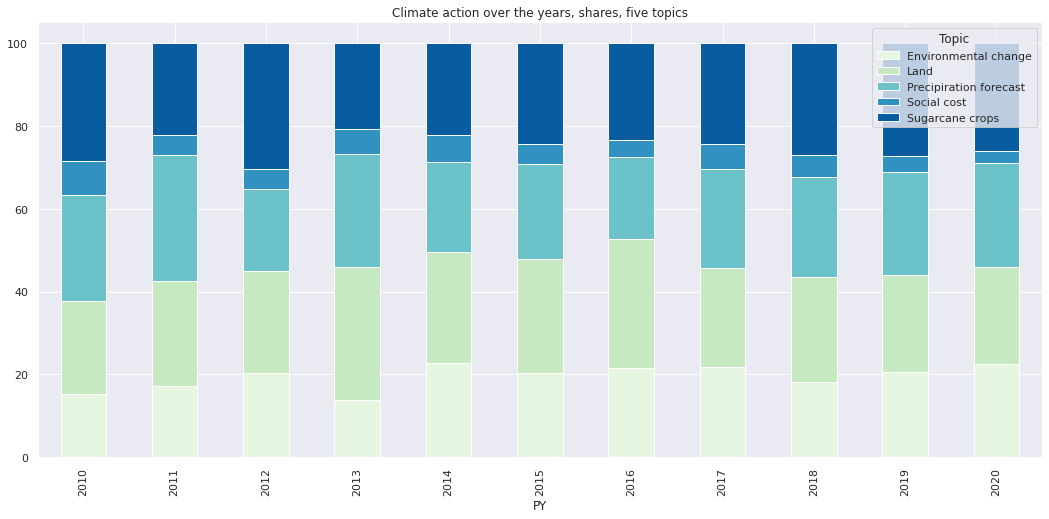

/home/kevin-main/anaconda3/envs/datascience/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/kevin-main/anaconda3/envs/datascience/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/kevin-main/anaconda3/envs/datascience/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/kevin-main/anaconda3/envs/datascience/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/ke

In [35]:
gr = year_topic_percentage.T.plot(kind='bar', stacked=True, colormap=ListedColormap(sns.color_palette("GnBu", 10)), figsize=(18,8))
gr.set(title="Climate action over the years, shares, five topics")
gr.figure.savefig("CA_5topics_share.png")
